# IMU Data Classification

In [14]:
# Visualisation
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import warnings

# Data processing
from sklearn.impute import KNNImputer

# Machine learning
from sklearn.model_selection import train_test_split

# Helper functions
from helper.helper_filter import *
from helper.helper_preprocess import *
from helper.helper_train import *

## Filter data
### Extract data tables and visualise

In [15]:
# Read the raw data from each target action and store them in a list
lqw_raw = load_data("./IMU_Data/LGW")
ramp_ascend_raw = load_data("./IMU_Data/Ramp_ascend")
ramp_descend_raw = load_data("./IMU_Data/Ramp_descend")
sit_to_stand_raw = load_data("./IMU_Data/Sit_to_stand")
stand_to_sit_raw = load_data("./IMU_Data/Stand_to_sit")

folders = [lqw_raw, ramp_ascend_raw, ramp_descend_raw, sit_to_stand_raw, stand_to_sit_raw]

In [ ]:
# Preview some of the data to check format
lqw_raw[0].data.describe()

,Thigh_R_Timestamp,Thigh_R_Gyroscope_X,Thigh_R_Gyroscope_Y,Thigh_R_Gyroscope_Z,Thigh_R_Accelerometer_X,Thigh_R_Accelerometer_Y,Thigh_R_Accelerometer_Z,Thigh_R_Magnetometer_X,Thigh_R_Magnetometer_Y,Thigh_R_Magnetometer_Z,...,Pelvis_Gyroscope_Y,Pelvis_Gyroscope_Z,Pelvis_Accelerometer_X,Pelvis_Accelerometer_Y,Pelvis_Accelerometer_Z,Pelvis_Magnetometer_X,Pelvis_Magnetometer_Y,Pelvis_Magnetometer_Z,Annotation_Pulse,Annotation_Level
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,...,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.0,1626.0
mean,249721.679675,3.016005,-20.459045,2.968838,-1.211503,9.496468,3.547880,-0.098999,-0.685384,-0.268764,...,-21.807592,-5.205306,-0.005444,9.747295,-0.915822,-0.016177,-0.644223,0.072678,0.0,0.0
std,4585.254729,37.556036,99.867926,77.125395,4.501860,2.824768,2.773884,0.350785,0.133166,0.212483,...,52.899000,20.501709,1.588494,1.822342,1.491137,0.288767,0.080635,0.278026,0.0,0.0
min,241787.109400,-119.396500,-443.269200,-193.665800,-19.053100,0.554900,-10.541900,-0.706700,-1.003900,-0.696300,...,-229.559600,-66.004400,-5.997400,5.480000,-7.538100,-0.482400,-0.833300,-0.320300,0.0,0.0
25%,245754.394500,-18.716200,-85.597100,-31.442400,-3.091850,8.115800,2.167850,-0.384800,-0.763100,-0.449000,...,-26.214600,-17.276975,-1.092800,8.343075,-1.701800,-0.275950,-0.703100,-0.177400,0.0,0.0
50%,249721.679700,-0.304400,1.286950,20.257900,-1.640950,9.261300,3.509750,-0.142900,-0.681600,-0.232100,...,-5.902800,-2.967900,-0.039300,9.638200,-0.943300,-0.152100,-0.639800,-0.110600,0.0,0.0
75%,253688.964800,23.651300,43.328700,63.823900,0.294725,10.788800,4.824850,0.186225,-0.605800,-0.123600,...,7.363425,9.336600,1.070175,10.804825,0.149500,0.278300,-0.592000,0.331800,0.0,0.0
max,257656.250000,124.481600,296.799300,107.897900,22.233200,21.557300,17.202800,0.628600,-0.355300,0.305900,...,63.326800,39.415100,4.163400,15.563400,3.690000,0.413700,-0.413800,0.656700,0.0,0.0


In [ ]:
lqw_raw[0].data.head()

,Thigh_R_Timestamp,Thigh_R_Gyroscope_X,Thigh_R_Gyroscope_Y,Thigh_R_Gyroscope_Z,Thigh_R_Accelerometer_X,Thigh_R_Accelerometer_Y,Thigh_R_Accelerometer_Z,Thigh_R_Magnetometer_X,Thigh_R_Magnetometer_Y,Thigh_R_Magnetometer_Z,...,Pelvis_Gyroscope_Y,Pelvis_Gyroscope_Z,Pelvis_Accelerometer_X,Pelvis_Accelerometer_Y,Pelvis_Accelerometer_Z,Pelvis_Magnetometer_X,Pelvis_Magnetometer_Y,Pelvis_Magnetometer_Z,Annotation_Pulse,Annotation_Level
0,241787.1094,0.5345,1.2220,-0.8404,-2.1075,9.1086,3.2014,-0.2819,-0.7146,-0.2299,...,0.5600,0.0212,-0.1209,9.6397,-1.0211,-0.1688,-0.6494,-0.1636,0.0,0.0
1,241796.8750,0.5345,1.2220,-0.8404,-2.1090,9.0322,3.0518,-0.2819,-0.7223,-0.2321,...,0.5600,0.0212,-0.1209,9.7162,-1.0218,-0.1725,-0.6264,-0.1728,0.0,0.0
2,241806.6406,-0.2664,0.2175,-1.1036,-2.1872,9.1850,3.2015,-0.2800,-0.7049,-0.2148,...,0.5600,0.0212,-0.1209,9.7926,-1.0226,-0.1781,-0.6533,-0.1751,0.0,0.0
3,241816.4062,-0.2664,0.2175,-1.1036,-2.1082,9.1850,3.1255,-0.2876,-0.7049,-0.2169,...,1.0746,-0.0255,-0.2044,9.7123,-1.4106,-0.1744,-0.6513,-0.1728,0.0,0.0
4,241826.1719,-0.2664,0.2175,-1.1036,-2.0293,9.0322,3.0510,-0.2743,-0.6893,-0.2169,...,1.0746,-0.0255,-0.2793,9.7934,-0.9448,-0.1725,-0.6284,-0.1728,0.0,0.0


array([[<AxesSubplot: title={'center': 'Thigh_R_Timestamp'}>,
        <AxesSubplot: title={'center': 'Thigh_R_Gyroscope_X'}>,
        <AxesSubplot: title={'center': 'Thigh_R_Gyroscope_Y'}>,
        <AxesSubplot: title={'center': 'Thigh_R_Gyroscope_Z'}>,
        <AxesSubplot: title={'center': 'Thigh_R_Accelerometer_X'}>,
        <AxesSubplot: title={'center': 'Thigh_R_Accelerometer_Y'}>,
        <AxesSubplot: title={'center': 'Thigh_R_Accelerometer_Z'}>,
        <AxesSubplot: title={'center': 'Thigh_R_Magnetometer_X'}>],
       [<AxesSubplot: title={'center': 'Thigh_R_Magnetometer_Y'}>,
        <AxesSubplot: title={'center': 'Thigh_R_Magnetometer_Z'}>,
        <AxesSubplot: title={'center': 'Shank_R_Timestamp'}>,
        <AxesSubplot: title={'center': 'Shank_R_Gyroscope_X'}>,
        <AxesSubplot: title={'center': 'Shank_R_Gyroscope_Y'}>,
        <AxesSubplot: title={'center': 'Shank_R_Gyroscope_Z'}>,
        <AxesSubplot: title={'center': 'Shank_R_Accelerometer_X'}>,
        <AxesSubpl

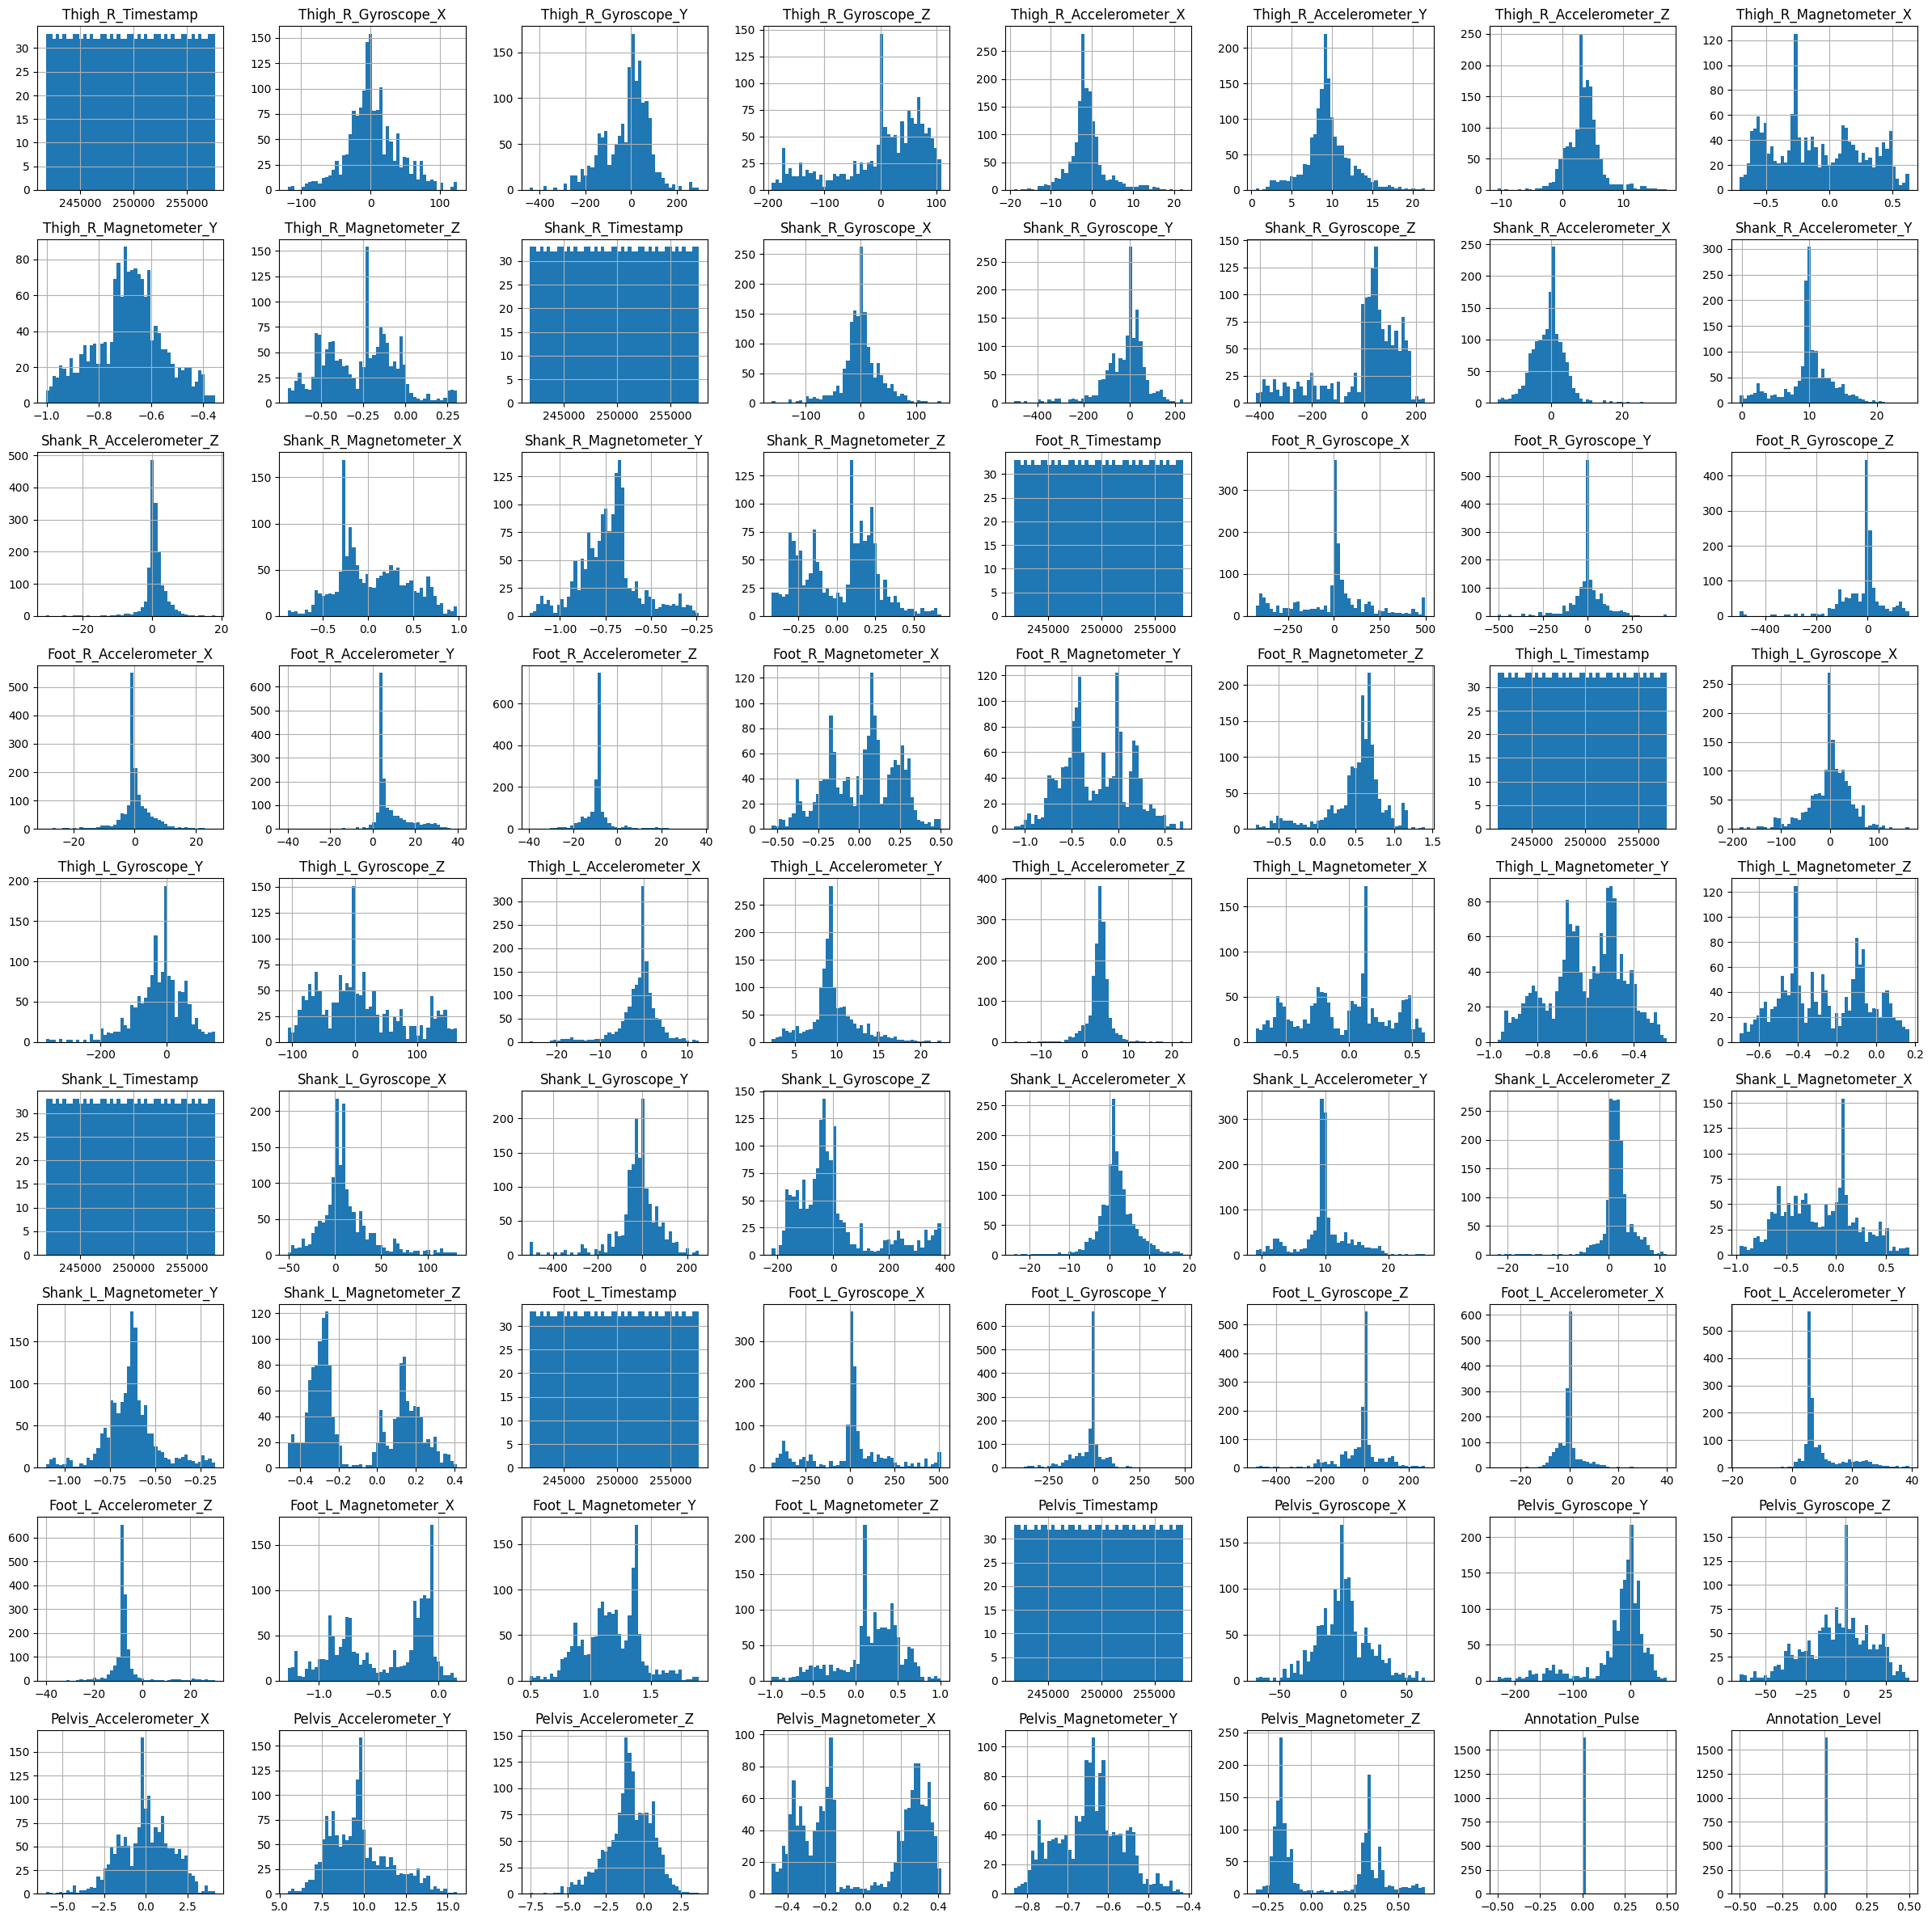

In [ ]:
# Plot histograms to visualize all data
lqw_raw[0].data.hist(bins=50,figsize=(30,30))

In [ ]:
# Check entries that are outside of the standard deviation
std_table = []
head = ["Action","File name", "Column name", "Mean", "Standard deviation", "#entries>5std", "#entries<5std"]

for folder in folders:
    for file in folder:
        for column in file.data:
            mean = file.data[column].mean()
            std = file.data[column].std()
            count_above_std5 = 0
            count_below_std5 = 0

            for entry in file.data[column]:
                if entry < mean - std*5:
                    count_below_std5 += 1
                elif entry > mean + std*5:
                    count_above_std5 += 1

            if count_above_std5 > 0 or count_below_std5 > 0:
                std_table.append([file.folder_name, file.file_name, column, format(mean, '.4f'), format(std, '.4f'), count_above_std5, count_below_std5]) # add data for every column

print(tabulate(std_table, headers=head, tablefmt="grid"))

+--------------+---------------------------------------+-------------------------+----------+----------------------+-----------------+-----------------+
| Action       | File name                             | Column name             |     Mean |   Standard deviation |   #entries>5std |   #entries<5std |
+==============+=======================================+=========================+==========+======================+=================+=================+
| LGW          | normal_walk_J_trial_02.dat            | Thigh_R_Accelerometer_X |  -1.2115 |               4.5019 |               1 |               0 |
+--------------+---------------------------------------+-------------------------+----------+----------------------+-----------------+-----------------+
| LGW          | normal_walk_J_trial_02.dat            | Thigh_R_Accelerometer_Z |   3.5479 |               2.7739 |               0 |               1 |
+--------------+---------------------------------------+-------------------------+

### Check for unwanted columns
From the table above, we can see how multiple timestamps have been used across different files. It was decided to investigate further whether the timestamps are aligned and can be ignored. It can be seen how, under the LGW some files are missing "Sync" and "Offset" timestamp files, so it was decided to remove all columns that contains them to ensure consistency across the data. Additionally, the LWR from SV is missing the timestamp from the Right sensors and Thigh. The timestamps that appear across al columns are 'Shank_L_Timestamp', 'Foot_L_Timestamp', 'Pelvis_Timestamp', arguebly one of them should be used as the baseline time.

The total number of entries is plotted as well, it can be seen how the majority of the data comes from the ground walking action and less from the standing and sitting actions. This might result in a bias towards the former action mentioned.

In [ ]:
# Check number of columns in each dataframe
column_table = []
head = ["Action","File name", "Row Nr", "Column Nr", "Non-standard columns names"]

for folder in folders:
    for file in folder:
        filtered_columns =[col for col in file.data.columns if "timestamp" in col.lower()]
        column_table.append([file.folder_name, file.file_name, file.data.index.size, len(file.data.columns), filtered_columns])

#print(tabulate(column_table, headers=head, tablefmt='grid'))

In [ ]:
# Check if all timestamps columns have the same data inside a dataframe and check what is the difference in time between them
reference_columns = ['Shank_L_Timestamp', 'Foot_L_Timestamp', 'Pelvis_Timestamp']

for folder in folders:
    for file in folder:
        for ref in reference_columns:
            # Filter columns to get only those containing time
            time_columns = [col for col in file.data_filtered.columns if 'timestamp' in col.lower()]

            # Reference column for comparison
            ref_column = file.data_filtered[ref]
            time_difference = []
            for col in time_columns:
                time_difference.append(file.data_filtered[col] - ref_column)

            means = [sum(inner_array)/len(inner_array) for inner_array in time_difference]
            if max(means) > 1000.: # if difference is bigger than 1 seconds
                #print(f"Using {ref} - Different timestamp in {file.file_name} with maximum value: {format(max(means), '.4f')}")
                pass

In [ ]:
# Drop all columns that contain sync, annotations and offset timestamps
for folder in folders:
    for file in folder:
        # Drop all columns that contain sync, annotations and offset timestamps
        file.data_filtered.drop(columns=[col for col in file.data_filtered.columns if 
                                any(info in col.lower() for info in ["sync", "offset", "annotation"])], inplace=True)
        
        # Drop all timestamp columns that are not "Shank_L_Timestamp"
        for column in file.data_filtered.columns:
            if "timestamp" in column.lower():
                if column.lower() != "shank_l_timestamp":
                    file.data_filtered.drop(columns=column, inplace=True)
        
        # Replace column name and place as the first index 
        file.data_filtered.rename(columns={'Shank_L_Timestamp': 'Timestamp'}, inplace=True)
        col = file.data_filtered.pop('Timestamp')
        file.data_filtered.insert(0, col.name, col)

In [ ]:
# Check number of columns in each dataframe
column_table = []
head = ["Action","File name", "Row Nr", "Column Nr"]

for folder in folders:
    for file in folder:
        column_table.append([file.folder_name, file.file_name, file.data.index.size, len(file.data.columns)])

print(tabulate(column_table, headers=head, tablefmt='grid'))

+--------------+---------------------------------------+----------+-------------+
| Action       | File name                             |   Row Nr |   Column Nr |
+==============+=======================================+==========+=============+
| LGW          | normal_walk_J_trial_02.dat            |     1626 |          64 |
+--------------+---------------------------------------+----------+-------------+
| LGW          | normal_walk_J_trial_03.dat            |     1489 |          64 |
+--------------+---------------------------------------+----------+-------------+
| LGW          | normal_walk_lg_trial_01.dat           |     1521 |          64 |
+--------------+---------------------------------------+----------+-------------+
| LGW          | normal_walk_lg_trial_02.dat           |     1521 |          64 |
+--------------+---------------------------------------+----------+-------------+
| LGW          | normal_walk_lg_trial_03.dat           |     1426 |          64 |
+--------------+

### Check for NaNs
It can be observed how the only files that contains NaNs are normal_walk_lg_trial_01.dat and normal_walk_lg_trial_02.dat. Both files contain 1521 entry with 17 or 56 NaN entries in individual columns. The NaN values constitute 1.12% and 3.68%, respectively of the toal entries. A nearest neighbors imputation strategy is used to replace the missing data from the set. Originally, a simple imputation was used with a "median" strategy, but, after checking the data, all of the features that need imputation are Gaussian distributed (except the Pelvic magnetometer data that has two peaks). It is better to replace the missing data with a Gaussian distributed set of values compared to a constant. k-Nearest Neighbors offers the advantage of tuning the missing values by using the neighboring entries. 

In [ ]:
# Check number of columns in each dataframe
nan_table = []
head = ["Action","File name", "NaN total number", "NaN columns"]
columns_to_visualize = []

for folder in folders:
    for file in folder:
        nan_number = file.data_filtered.isnull().sum().sum()
        
        # Add to table only if there are NaN values
        if nan_number > 0:
            nan_columns = ""
            columns_to_visualize.append(file.data_filtered)
            
            # Check which columns have NaN values and how many
            for col in file.data_filtered.columns:
                if file.data_filtered[col].isnull().sum() > 0:
                    nan_columns += col + "=" + str(file.data_filtered[col].isnull().sum()) + "\n"
            
            nan_table.append([file.folder_name, file.file_name, nan_number, nan_columns])

#print(tabulate(nan_table, headers=head, tablefmt='grid'))

In [ ]:
# Plot histograms to visualize all data
#for visualize in columns_to_visualize:
#    visualize.hist(bins=50,figsize=(30,30))

In [ ]:
# Replace NaN values with the k-Nearest Neighbor
for folder in folders:
    for file in folder:
        if file.data_filtered.isnull().sum().sum() > 0:
            imputer = KNNImputer(n_neighbors=5)
            file.data_filtered = pd.DataFrame(imputer.fit_transform(file.data_filtered),columns = file.data_filtered.columns)

In [ ]:
# Check if any NaN values are left
for folder in folders:
    for file in folder:
        if file.data_filtered.isnull().sum().sum() > 0: 
            print("NaN values left")

## Preprocess data
### Apply filtering
Check IMU data against vibrations; accelerometer records high frequency noise with vibration. It was calculated that the sampling time is about 9.8 miliseconds, frequency of about 102.4Hz.

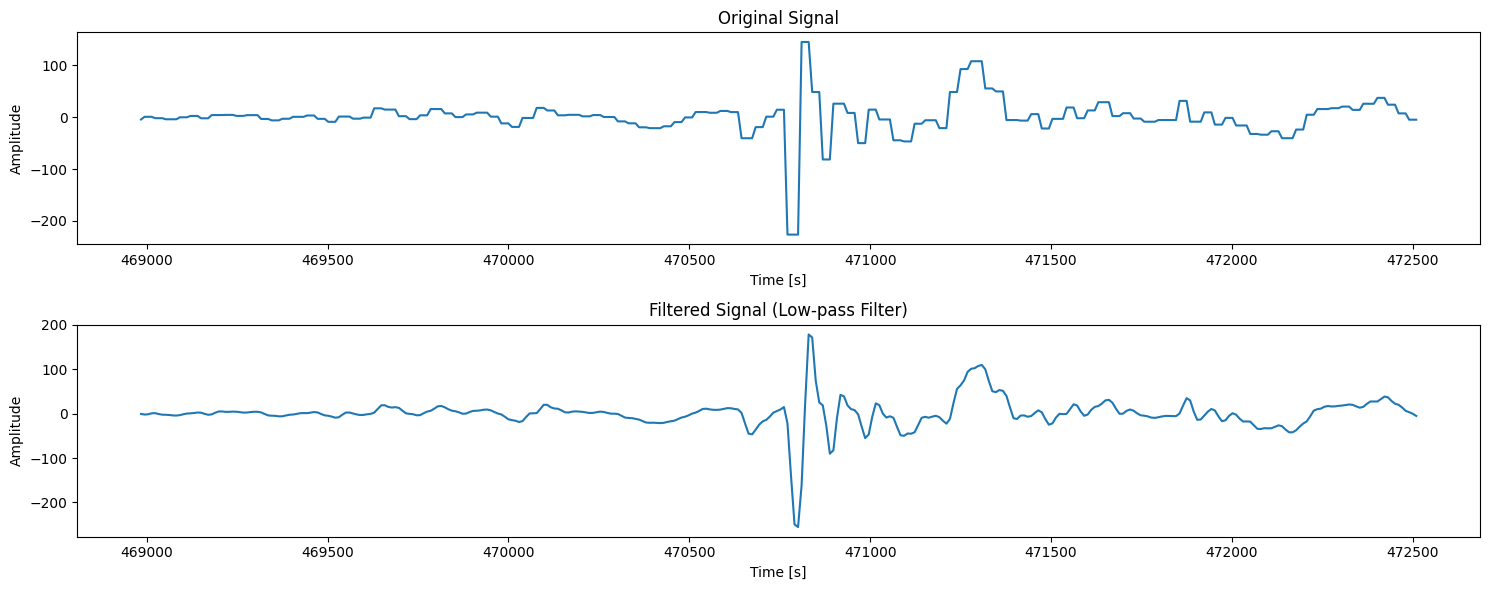

In [ ]:
# Check the filter and find appropriate parameters
from scipy.signal import lfilter, butter

data = folder[0].data_filtered
old_data = folder[0].data["Thigh_R_Gyroscope_Y"]
new_data = None

# Sampling frequency
ts = data["Timestamp"].diff().median()  # Sampling time
fs = 1000/ts                            # Sampling frequency

# Filter design
N = 3               # Order of the filter 
cutoff = 25.0       # Cutoff frequency

# Apply filter
new_data = low_pass_filter(ts, old_data)

# Plot the original and filtered signals
plt.figure(figsize=(15, 6))
start = 0
end = 500

plt.subplot(2, 1, 1)
plt.plot(data["Timestamp"][start:end], old_data[start:end])
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(data["Timestamp"][start:end], new_data[start:end])
plt.title('Filtered Signal (Low-pass Filter)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [ ]:
# Remove outliers and smooth curve using a low pass filter
for folder in folders:
    for file in folder:
        # Extract sampling time
        ts = file.data_filtered["Timestamp"].diff().median() # Median sampling time

        # Remove outliers
        for name, data in file.data_filtered.items():
            if name != 'Timestamp':
                data = low_pass_filter(ts, data)

### Apply the slinding window technique

In [ ]:
# Check if technique works
tw = 350    # window size
dt = 50     # time increment

test = folder[0].data_filtered
output = pd.DataFrame()

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)
    output = generate_features(test, tw, dt)

#display(output)

In [ ]:
tw = 350        # window size
dt = 50         # window step

# Apply the moving average filter to the data and get all features
for folder in folders:
    for file in folder[:2]: # TODO REMEMBER TO SWITCH TO ALL FILES!! 
        # Apply the slinding window to the data
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)
            file.data_processed = generate_features(file.data_filtered, tw, dt)

        # Drop first row where the gradient is 0
        file.data_processed = file.data_processed.iloc[1:]

In [ ]:
# Check if technique works
file.data_processed.head()

,Thigh_R_Gyroscope_X_max,Thigh_R_Gyroscope_Y_max,Thigh_R_Gyroscope_Z_max,Thigh_R_Accelerometer_X_max,Thigh_R_Accelerometer_Y_max,Thigh_R_Accelerometer_Z_max,Thigh_R_Magnetometer_X_max,Thigh_R_Magnetometer_Y_max,Thigh_R_Magnetometer_Z_max,Shank_R_Gyroscope_X_max,...,Foot_L_Magnetometer_Z_zero_crossings,Pelvis_Gyroscope_X_zero_crossings,Pelvis_Gyroscope_Y_zero_crossings,Pelvis_Gyroscope_Z_zero_crossings,Pelvis_Accelerometer_X_zero_crossings,Pelvis_Accelerometer_Y_zero_crossings,Pelvis_Accelerometer_Z_zero_crossings,Pelvis_Magnetometer_X_zero_crossings,Pelvis_Magnetometer_Y_zero_crossings,Pelvis_Magnetometer_Z_zero_crossings
5,0.9035,2.4764,0.1565,-1.7917,9.2613,3.2007,0.3714,-0.6874,-0.0672,1.5100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.9035,2.4764,0.7851,-1.7917,9.2613,3.3519,0.3714,-0.6796,-0.0651,2.4683,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
15,0.9035,2.4764,1.3421,-1.7917,9.3377,3.3519,0.3924,-0.6796,-0.0651,2.4683,...,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
20,0.9035,2.4764,1.3421,-1.7917,9.3377,3.3519,0.3924,-0.6796,-0.0651,2.4683,...,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
25,0.9035,4.8863,1.3421,-1.7917,9.3377,3.3519,0.3924,-0.6796,-0.0651,2.4683,...,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_one_hot_encoding(folders):
    names = []
    for folder in folders:
        names.append(folder[0].folder_name)
    return pd.get_dummies(names)

In [ ]:
names_one_hot = get_one_hot_encoding(folders)
names_one_hot.head()

,LGW,Ramp_ascend,Ramp_descend,Sit_to_stand,Stand_to_sit
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [ ]:
# Combine all five actions into one dataframe and set the target labels using one-hot encoding 
iterator = 1
all_df = []

for folder in folders:    
    # Create single dataframe for action
    df = pd.DataFrame()
    df = pd.concat([file.data_processed for file in folder[:2]])

    # Add target labels
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)
        df["Action"] = iterator
        iterator = iterator + 1
    
    # Add dataframe to the list
    all_df.append(df)

# Combine all dataframes into one
df = pd.concat(all_df)

In [ ]:
all_df[3]

,Thigh_R_Gyroscope_X_max,Thigh_R_Gyroscope_Y_max,Thigh_R_Gyroscope_Z_max,Thigh_R_Accelerometer_X_max,Thigh_R_Accelerometer_Y_max,Thigh_R_Accelerometer_Z_max,Thigh_R_Magnetometer_X_max,Thigh_R_Magnetometer_Y_max,Thigh_R_Magnetometer_Z_max,Shank_R_Gyroscope_X_max,...,Pelvis_Gyroscope_X_zero_crossings,Pelvis_Gyroscope_Y_zero_crossings,Pelvis_Gyroscope_Z_zero_crossings,Pelvis_Accelerometer_X_zero_crossings,Pelvis_Accelerometer_Y_zero_crossings,Pelvis_Accelerometer_Z_zero_crossings,Pelvis_Magnetometer_X_zero_crossings,Pelvis_Magnetometer_Y_zero_crossings,Pelvis_Magnetometer_Z_zero_crossings,Action
5,0.0778,0.9504,-0.2482,9.1975,3.6862,1.9447,-0.7676,-0.5379,-0.1410,0.0031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
10,0.4147,0.9504,-0.2482,9.1975,3.6862,2.0192,-0.7638,-0.5359,-0.1410,0.0246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
15,0.4147,0.9504,-0.2482,9.1975,3.6862,2.0192,-0.7638,-0.5359,-0.1410,0.0515,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4
20,0.4147,0.9504,-0.2482,9.1975,3.6862,2.0952,-0.7638,-0.5359,-0.1410,0.1236,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4
25,0.4147,0.9504,-0.2482,9.1975,3.6862,2.0952,-0.7638,-0.5359,-0.1410,0.1236,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,128.5291,297.8521,130.2913,20.9923,15.1420,9.2949,0.4838,-0.5165,0.1258,20.7544,...,23.0,24.0,28.0,22.0,0.0,4.0,1.0,0.0,1.0,4
340,128.5291,297.8521,130.2913,20.9923,15.1420,9.2949,0.4838,-0.5165,0.1258,20.7544,...,23.0,24.0,29.0,23.0,0.0,4.0,1.0,0.0,1.0,4
345,128.5291,297.8521,130.2913,20.9923,15.1420,9.2949,0.4838,-0.5165,0.1258,20.7544,...,25.0,25.0,29.0,26.0,0.0,4.0,1.0,0.0,1.0,4
350,128.5291,297.8521,130.2913,20.9923,15.1420,9.2949,0.4838,-0.5165,0.1258,20.7544,...,25.0,25.0,30.0,27.0,0.0,4.0,1.0,0.0,1.0,4


## Train models

Start by splitting the data into training and testing.

In [1]:
# Visualisation
import matplotlib.pyplot as plt
from tabulate import tabulate

# Machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

# Helper functions
from helper.helper_train import *

In [2]:
# get csv data
df = pd.read_csv('combined_data.csv')

In [3]:
# Split data
X = df.iloc[:, :-1]     # Input features
y = df.iloc[:, -1:]     # Target labels

# Split data into training (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=109)

### ANN

Without any hyperparameter tuning or scalar, the accuracy is 21.06% (included a random seed to ensure consistency). With a scalar added, the accuracy is already 98.6%. It goes up to 100% with hyperparameter tuning.

In [4]:
ann = ANN(X_train, X_test, y_train, y_test)
ann.run_pipeline()
ann.evaluate()

### SVM

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Classification error:  1.0


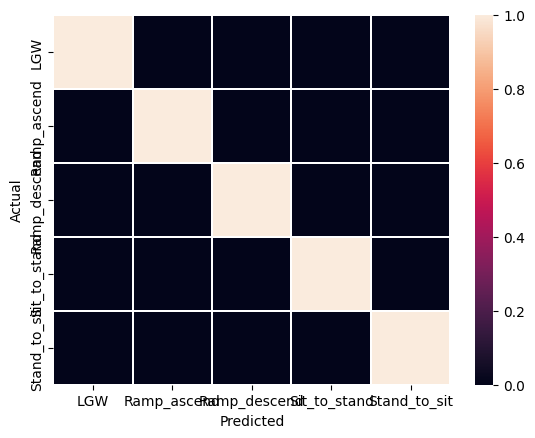

In [ ]:
svm = SVM(X_train, X_test, y_train, y_test)
svm.run_pipeline()
svm.evaluate()

### CNN

In [ ]:
# TODO

### Comparison

Find the 15 most relevant weights for both ANN and SVG. From the figures below, it can be seen how th emost important features in the dataset are related to the gyroscope value. This makes sense as our joints have a more rotational based motion rather than translational.

Text(0.5, 0, 'Permutation Importance')

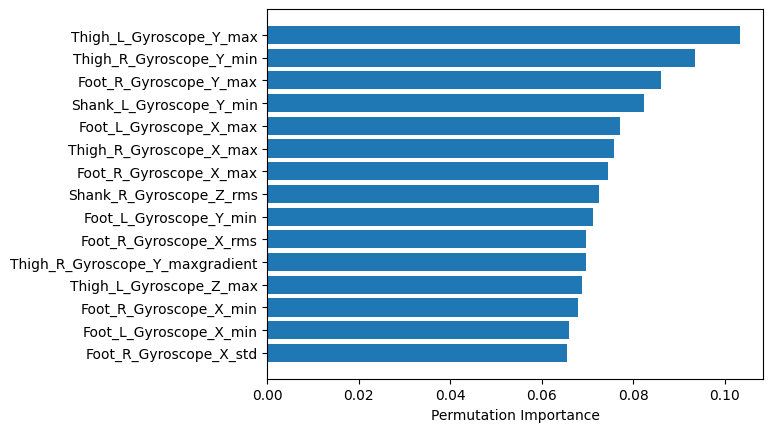

In [ ]:
ann_features, ann_scores = ann.get_most_relevant_features(X_train.columns,
                                                          X_train.values,
                                                          y_train.values)

# Plot
plt.barh(ann_features, ann_scores)
plt.xlabel("Permutation Importance")

Text(0.5, 0, 'Permutation Importance')

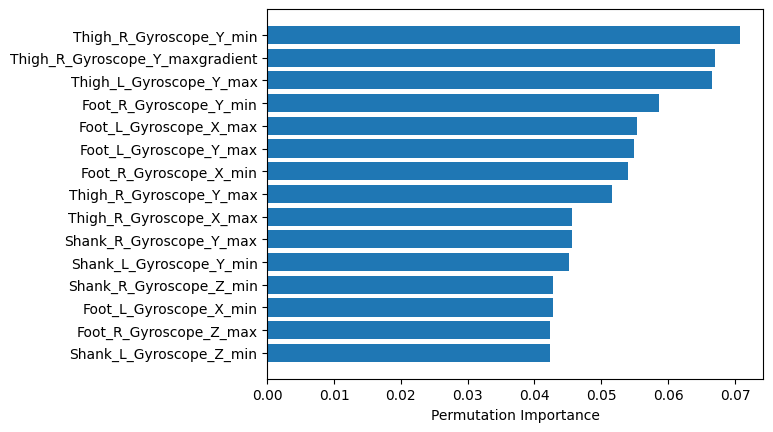

In [ ]:
svm_features, svm_scores = svm.get_most_relevant_features(X_train.columns,
                                                          X_train.values,
                                                          y_train.values)

# Plot 
plt.barh(svm_features, svm_scores)
plt.xlabel("Permutation Importance")


Find the most significant segment which contributes to the activities recognition based on the ANN prediction

In [ ]:
# Separate data based on the segment
sensors = ["Foot_L", "Foot_R", "Thigh_L", "Thigh_R", "Shank_L", "Shank_L", "Pelvis"]
sensors_data = {}

# Get all columns that contain the sensor name
for sensor in sensors:
    columns = [col for col in df.columns if (sensor in col or "Action" in col)]
    sensors_data[sensor] = df[columns]

In [ ]:
# Print first sensor data
first_entry = next(iter(sensors_data.values()))
first_entry.head()

,Foot_L_Gyroscope_X_max,Foot_L_Gyroscope_Y_max,Foot_L_Gyroscope_Z_max,Foot_L_Accelerometer_X_max,Foot_L_Accelerometer_Y_max,Foot_L_Accelerometer_Z_max,Foot_L_Magnetometer_X_max,Foot_L_Magnetometer_Y_max,Foot_L_Magnetometer_Z_max,Foot_L_Gyroscope_X_min,...,Foot_L_Gyroscope_X_zero_crossings,Foot_L_Gyroscope_Y_zero_crossings,Foot_L_Gyroscope_Z_zero_crossings,Foot_L_Accelerometer_X_zero_crossings,Foot_L_Accelerometer_Y_zero_crossings,Foot_L_Accelerometer_Z_zero_crossings,Foot_L_Magnetometer_X_zero_crossings,Foot_L_Magnetometer_Y_zero_crossings,Foot_L_Magnetometer_Z_zero_crossings,Action
0,0.1372,-0.1706,-0.3320,0.0820,5.8642,-7.8518,-0.058,1.3887,0.1315,0.1040,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1
1,0.6534,-0.0197,-0.2147,0.0820,5.9396,-7.8518,-0.054,1.3950,0.1315,0.1040,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1
2,0.6534,-0.0197,-0.2091,0.0820,5.9396,-7.7739,-0.050,1.3992,0.1315,0.0755,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1
3,0.6534,-0.0197,-0.2091,0.0844,5.9396,-7.6897,-0.050,1.3992,0.1315,0.0755,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1
4,0.6534,0.1322,0.0991,0.0844,6.0166,-7.6897,-0.050,1.3992,0.1315,-0.3424,...,1.0,2.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
models = []

# Get the accuracy of the ANN on each separate data
for key, data in sensors_data.items():
    # Split data
    X = data.iloc[:, :-1]     # Input features
    y = data.iloc[:, -1:]     # Target labels

    # Split data into training (70%) and testing set (30%)
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.7, random_state=42)

    # Create network and get accuracy
    sensor_ann = ANN(X_tr, X_te, y_tr, y_te)
    sensor_ann.run_pipeline()
    print(f'{key} accuracy : {sensor_ann.get_accuracy()}')

    # Add model to the list
    models.append(ModelToCompare(key , sensor_ann.get_accuracy(), sensor_ann, X_tr, X_te, y_tr, y_te))

Foot_L accuracy : 1.0
Foot_R accuracy : 0.999003984063745
Thigh_L accuracy : 1.0
Thigh_R accuracy : 1.0
Shank_L accuracy : 1.0
Pelvis accuracy : 1.0


In [ ]:
# Check highest accuacy
max_acc_model = max(models, key=lambda item: item.accuracy) 

In [ ]:
# Using only the most relevant feature, calculate the clasification error using ANN
print(f"Classification error of the ANN using {max_acc_model.sensor}: {max_acc_model.model.get_classification_error()}")

Classification error of the ANN using Foot_L: 1.0


In [ ]:
sensor = sensors_data[max_acc_model.sensor]

In [ ]:
sensor

,Foot_L_Gyroscope_X_max,Foot_L_Gyroscope_Y_max,Foot_L_Gyroscope_Z_max,Foot_L_Accelerometer_X_max,Foot_L_Accelerometer_Y_max,Foot_L_Accelerometer_Z_max,Foot_L_Magnetometer_X_max,Foot_L_Magnetometer_Y_max,Foot_L_Magnetometer_Z_max,Foot_L_Gyroscope_X_min,...,Foot_L_Gyroscope_X_zero_crossings,Foot_L_Gyroscope_Y_zero_crossings,Foot_L_Gyroscope_Z_zero_crossings,Foot_L_Accelerometer_X_zero_crossings,Foot_L_Accelerometer_Y_zero_crossings,Foot_L_Accelerometer_Z_zero_crossings,Foot_L_Magnetometer_X_zero_crossings,Foot_L_Magnetometer_Y_zero_crossings,Foot_L_Magnetometer_Z_zero_crossings,Action
0,0.1372,-0.1706,-0.3320,0.0820,5.8642,-7.8518,-0.058,1.3887,0.1315,0.1040,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1
1,0.6534,-0.0197,-0.2147,0.0820,5.9396,-7.8518,-0.054,1.3950,0.1315,0.1040,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1
2,0.6534,-0.0197,-0.2091,0.0820,5.9396,-7.7739,-0.050,1.3992,0.1315,0.0755,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1
3,0.6534,-0.0197,-0.2091,0.0844,5.9396,-7.6897,-0.050,1.3992,0.1315,0.0755,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,1
4,0.6534,0.1322,0.0991,0.0844,6.0166,-7.6897,-0.050,1.3992,0.1315,-0.3424,...,1.0,2.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,21.8047,14.0127,13.5084,0.8699,7.6302,-7.2623,-0.634,0.6786,0.2981,-14.4703,...,10.0,19.0,12.0,33.0,0.0,0.0,0.0,0.0,0.0,5
1430,21.8047,14.0127,13.5084,0.8699,7.6302,-7.2623,-0.634,0.6786,0.2981,-14.4703,...,10.0,19.0,12.0,33.0,0.0,0.0,0.0,0.0,0.0,5
1431,21.8047,14.0127,13.5084,0.8699,7.6302,-7.2623,-0.634,0.6786,0.2981,-14.4703,...,10.0,19.0,12.0,33.0,0.0,0.0,0.0,0.0,0.0,5
1432,21.8047,14.0127,13.5084,0.8699,7.6302,-7.2623,-0.634,0.6786,0.2981,-14.4703,...,10.0,19.0,12.0,33.0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
# Using only the most relevant feature, calculate the clasification error using SVM
sensor = sensors_data[max_acc_model.sensor]

# Split data
X = sensor.iloc[:, :-1]     # Input features
y = sensor.iloc[:, -1:]     # Target labels

# Split data into training (70%) and testing set (30%)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.7, random_state=42)

max_svm_model = SVM(X_tr, X_te, y_tr, y_te)
max_svm_model.run_pipeline()
print(f"Accuracy of the SVM using {max_acc_model.sensor}: {max_svm_model.get_accuracy()}")
print(f"Classification error of the SVM using {max_acc_model.sensor}: {max_svm_model.get_classification_error()}")

Accuracy of the SVM using Foot_L: 1.0
Classification error of the SVM using Foot_L: 1.0
